In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
# Load the data
df_danube = pd.read_csv('danube-data.csv', parse_dates=['date'], index_col=[0])
df_lulu = pd.read_csv('lulu-data.csv', parse_dates=['date'], index_col=[0])
df_tamimi = pd.read_csv('tamimi-data.csv', parse_dates=['date'], index_col=[0])

In [14]:
df_danube.head()

,date,name,price
0,2024-10-07,Lux Hand Wash Purifying Watermint 250ml,10.95
1,2024-10-07,Lux Botanicals Hand Wash Camelia &Aloevera 500ml,15.95
2,2024-10-07,Lux Soft Rose Perfumed Hand Wash 500ml,15.95
3,2024-10-07,Lux Botanicals Hand Wash Honey & Lotus 500ml,15.95
4,2024-10-07,Lux Botanicals Hand Wash Honey & Lotus 250ml,10.95


In [15]:
df_lulu.head()

,date,name,price
0,2024-10-07,Lux Purifying Watermint Perfumed Hand Soap 500 ml,25.75
1,2024-10-07,Lux Refreshing Verbena Perfumed Hand Soap 500 ml,25.75
2,2024-10-07,Home Mate Liquid Hand Soap Lavender Perfume 4 ...,23.95
3,2024-10-07,Lifebuoy Charcoal And Mint Handwash 500 ml,34.50
4,2024-10-07,Dettol Zing Mandarin Freshness Liquid Hand Was...,16.95


In [16]:
df_tamimi.head()

,date,name,price
0,2024-10-07,Sairo Intense Liquid Hand Soap-500Ml,8.75
1,2024-10-07,Sairo Liquid Melon Hand Soap-500Ml,8.75
2,2024-10-07,Gento Actifresh Hand Wash-500Ml,26.50
3,2024-10-07,Sanita Mounbreez Hand Wash-500Ml,13.50
4,2024-10-07,Lux Hand Wash Fig Extract-250Ml,10.25


# Descriptive Statisitcs

In [17]:
print("Danube")
print(df_danube['price'].describe())

print("Lulu")
print(df_lulu['price'].describe())

print("Tamimi")
print(df_tamimi['price'].describe())

Danube
count    20.000000
mean     16.077500
std       9.563437
min      10.950000
25%      12.862500
50%      14.350000
75%      15.950000
max      55.500000
Name: price, dtype: float64
Lulu
count    75.000000
mean     25.386000
std      12.750643
min       2.900000
25%      19.950000
50%      23.000000
75%      30.625000
max      63.950000
Name: price, dtype: float64
Tamimi
count    20.000000
mean     20.290000
std      10.729394
min       8.750000
25%      10.250000
50%      16.950000
75%      27.362500
max      37.950000
Name: price, dtype: float64


# Most expensive products

## Danube

In [19]:
price = df_danube['price'].max()
expensive_product = df_danube[df_danube['price']== price]
print(expensive_product.name)
print(expensive_product.price)

15    Dettol Skincare Anti-Bacterial Liquid Hand Was...
Name: name, dtype: object
15    55.5
Name: price, dtype: float64


## Lulu

In [20]:
price = df_lulu['price'].max()
expensive_product = df_lulu[df_lulu['price']== price]
print(expensive_product.name)
print(expensive_product.price)

17    OGX Shampoo Thick & Full + Biotin & Collagen 3...
20    OGX Shampoo Renewing + Argan Oil Of Morocco 38...
23       OGX Shampoo Anti Breakage + Keratin Oil 385 ml
37    OGX Shampoo Extra Strength + Argan Oil Of Moro...
Name: name, dtype: object
17    63.95
20    63.95
23    63.95
37    63.95
Name: price, dtype: float64


## Tamimi

In [21]:
price = df_tamimi['price'].max()
expensive_product = df_tamimi[df_tamimi['price']== price]
print(expensive_product.name)
print(expensive_product.price)

8        Dove Hand Wash Restoring Ritual Coconut-500Ml
9                  Dove Hand Wash Anti Bacterial-500Ml
12    Dove Hand Wash Invigorating Ritual Avocado-500Ml
Name: name, dtype: object
8     37.95
9     37.95
12    37.95
Name: price, dtype: float64


# Distribution of Hand soap prices across different brand and types

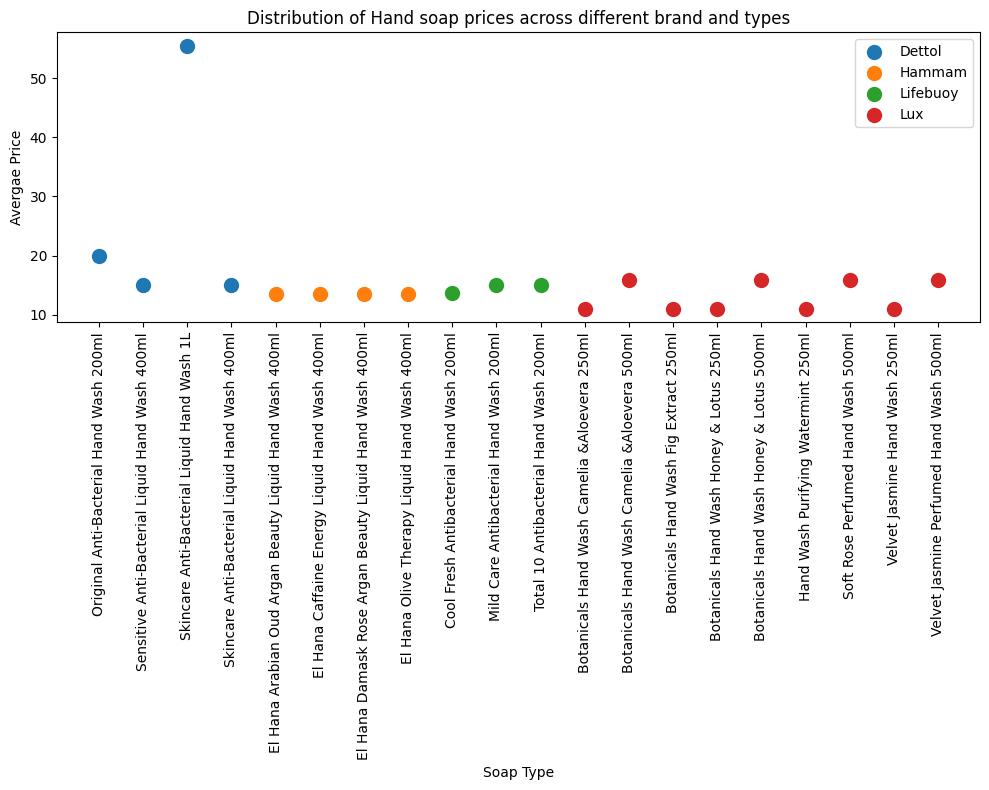

In [22]:
df_danube['brand']=df_danube['name'].apply(lambda x: x.split()[0])
df_danube['type'] = df_danube['name'].apply(lambda x: ' '.join(x.split()[1:]))
grouped_prices = df_danube.groupby(['brand', 'type'])['price'].mean().reset_index()
plt.figure(figsize=(10,8))
for brand in grouped_prices['brand'].unique():
  subset = grouped_prices[grouped_prices['brand'] == brand]
  plt.scatter(subset['type'], subset['price'], label=brand, s=100)

plt.xticks(rotation=90)
plt.xlabel("Soap Type")
plt.ylabel('Avergae Price')
plt.title('Distribution of Hand soap prices across different brand and types')
plt.legend()
plt.tight_layout()
plt.show()